# Statestiek - Feuture selection

### Van: Mart Veldkamp

We willen vandaag tevredenheid voorspellen met zo min mogelijk features

- [Bereken de correlaties tussen tevreden / ontevreden passagiers en de relevante(interval/ratio) features.](#1)
- [Bereken voor dezelfde features de t-scores; kijk naar de significantieende effect size](#2)
- [Bepaal welke features je mee neemt in een verdere analyse(op basis van de correlatiesende t-toetsen)](#3)


## 2. Laad de data en laat het zien 

In [2]:
import pandas as pd

data = pd.read_csv('Airlinesatisfaction.csv', sep=",")
data = data.drop(columns = ["Unnamed: 0", "id"], axis=1) 

#Voor alles wat geen dataType is, moeten we zelf een datatype "assignen"
data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
data['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
data['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1}, inplace = True)
data['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1}, inplace = True)
data['Class'].replace({'Eco': 1, 'Eco Plus': 2, 'Business':3}, inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

## 3. Bereken de correlaties tussen tevreden / ontevreden passagiers en de relevante(interval/ratio) features. <a class='anchor' id='1'></a>

Om erachter te komen wat we moeten meenemen als "relevante" features, moeten we beginnen met een correlatiematrix maken.    

### Correlatiematrix

<AxesSubplot:>

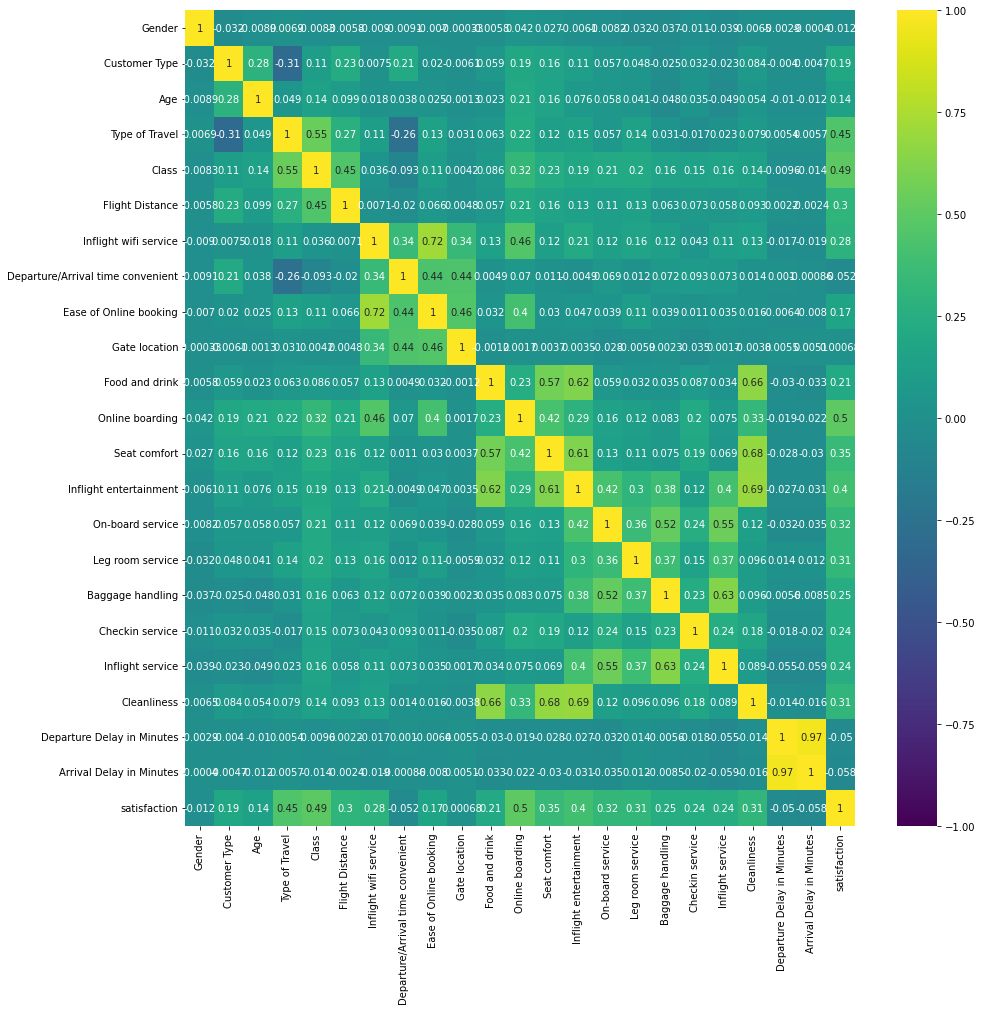

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 15))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='viridis', vmin=-1, vmax=1)

Wat we hier uit kunnen halen zijn de belangrijkste features die we nodig hebben om ons vraagstuk te beantwoorden. Ik heb gekozen dat elke feature boven een correlatie van 0.3 met satisfaction een "relevante feature" is. Om zo geen onnodige data te hoeven gebruiken.

### Correlatie belangrijke features en satisfaction (andere manier) 

In [4]:
corr_matrix = data.corr()
print(corr_matrix["satisfaction"].sort_values(ascending=False))

satisfaction                         1.000000
Online boarding                      0.503557
Class                                0.494471
Type of Travel                       0.449000
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Customer Type                        0.187638
Ease of Online booking               0.171705
Age                                  0.137167
Gate location                        0.000682
Gender                              -0.012211
Departure Delay in Minutes          -0.050494
Departure/Arrival time convenient 

Het voordeel hiervan ten opzichte van een correlatie matrix is dat je accuratere data terug krijgt. En bij meer features overzichtelijker

## 4. Bereken voor dezelfde features de t-scores; kijk naar de significantieende effect size <a class='anchor' id='2'></a>

Om te kijken of de ene feature een effect heeft op de andere kan gekeken worden naar een verschil tussen de gemiddelde van de features vergeleken met de andere feature. Zo kan bekeken worden of bijv. de gemiddelde leeftijd van patiënten met een stroke een verschil heeft met de gemiddelde van patiënten die nog nooit een stroke heeft gehad. Dit is wat de t-toets doet, en als er geen verschil is, kan er vanuit gegaan worden dat de feature geen invloed heeft op de target. Als de uitslag van de t-toets hoger ligt dan twee (*small nod to normal distribution*) dan kan gesteld worden dat er een verschil is tussen de groepen. Ofwel, we werpen de nulhypothese dat er geen verschil is.

De t-toets zelf is nuttig voor features waarmee gerekend kan worden (interval-ratio), dit sluit dus ook de categorisch features uit net als bij de correlatiematrix. De t-toets is echter wel nodig om later de Chi-squared uit te kunnen rekenen die vervolgens weer gebruikt wordt bij de Phi/Cramer's V.

### Voorbeeld voor één feature

In [26]:
import researchpy as rp
from researchpy import ttest

rp.ttest(data['Online boarding'], data['satisfaction'])

(          Variable         N      Mean        SD        SE  95% Conf.  \
 0  Online boarding  103904.0  3.250375  1.349509  0.004187   3.242170   
 1     satisfaction  103904.0  0.433333  0.495538  0.001537   0.430320   
 2         combined  207808.0  1.841854  1.737039  0.003810   1.834386   
 
    Interval  
 0  3.258581  
 1  0.436346  
 2  1.849322  ,
                                Independent t-test      results
 0  Difference (Online boarding - satisfaction) =        2.8170
 1                           Degrees of freedom =   207806.0000
 2                                            t =      631.6368
 3                        Two side test p value =        0.0000
 4                       Difference < 0 p value =        1.0000
 5                       Difference > 0 p value =        0.0000
 6                                    Cohen's d =        2.7712
 7                                    Hedge's g =        2.7712
 8                                Glass's delta =        2.0875
 

In [24]:
rp.ttest(data['Class'], data['satisfaction'])

(       Variable         N      Mean        SD        SE  95% Conf.  Interval
 0         Class  103904.0  2.028103  0.962858  0.002987   2.022248  2.033957
 1  satisfaction  103904.0  0.433333  0.495538  0.001537   0.430320  0.436346
 2      combined  207808.0  1.230718  1.105509  0.002425   1.225965  1.235471,
                      Independent t-test      results
 0  Difference (Class - satisfaction) =        1.5948
 1                 Degrees of freedom =   207806.0000
 2                                  t =      474.7113
 3              Two side test p value =        0.0000
 4             Difference < 0 p value =        1.0000
 5             Difference > 0 p value =        0.0000
 6                          Cohen's d =        2.0827
 7                          Hedge's g =        2.0827
 8                      Glass's delta =        1.6563
 9                        Pearson's r =        0.7213)

Omdat de dataset redelijk groot is, is er altijd significantie bij deze features (t-score &gt; twee), dus kan er beter gekeken worden naar Pearson's s r. wat dat betreft, lijkt alleen 'Online boarding' een redelijke score te hebben. Toch droppen we de rest nog niet. Mogelijk kunnen deze features namelijk ook een onderliggende samenhang hebben met Online Boarding. Wat we niet willen uitsluiten.

## 5. Bepaal welke features je mee neemt in een verdere analyse(op basis van de correlatiesende t-toetsen) <a class='anchor' id='3'></a>

De features die we zouden moeten gebruiken zijn:

- Online boarding
- Class
- Type of Travel
- Inflight entertainment
- Seat comfort
- On-board service
- Leg room service
- Cleanliness
- Flight Distance
- Inflight wifi service
- Baggage handling
- Inflight service         
- Checkin service 
- Food and drink       
- Customer Type   

Als je kijkt naar de correlatie tussen deze features en de target is deze erg, hoog. Ook hebben deze features allemaal met elkaar een gemiddelde correlatie waardoor het belangrijk is om deze niet uit te sluiten, hoewel ze misschien niet allemaal een hoge correlatie hebben met target.